## **YAP 101 Homework-2**  
Due Date: 18 February 2020 23:59

Upload your files to uzak.etu.edu.tr


### to install folium: run conda install -c conda-forge folium

In [30]:
# You might need to run this statement to show plots
%matplotlib inline

In [17]:
#for the last question run this code
import os 
import folium
from folium import plugins

**Question 1 [5 Points]**. Load the data in 'trip.csv' file. (It has been uploaded on Piazza)

Change "Start Terminal" column name  to "Start_Terminal_ID" and "End Terminal" column name  to "End_Terminal_ID"

In [18]:
import pandas as pd
tripFile = pd.read_csv("trip.csv")
tripFile = tripFile.rename(columns={"Start Terminal":"Start_Terminal_ID","End Terminal":"End_Terminal_ID"})
tripFile.head()

,Trip ID,Duration,Start Date,Start Station,Start_Terminal_ID,End Date,End Station,End_Terminal_ID,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


**Question 2 [5 Points]** Show the last 3 rows of the table

In [19]:
tripFile.tail(3)

,Trip ID,Duration,Start Date,Start Station,Start_Terminal_ID,End Date,End Station,End_Terminal_ID,Bike #,Subscriber Type,Zip Code
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32
354151,432947,569,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,318,Customer,32


**Question 3 [5 Points]** Remove Zip Code and Subscriber Type columns. Then show the first 3 rows.

In [20]:
tripFile.drop(columns = {"Zip Code","Subscriber Type"}, inplace=True)
tripFile.head(3)

,Trip ID,Duration,Start Date,Start Station,Start_Terminal_ID,End Date,End Station,End_Terminal_ID,Bike #
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468


**Question 4 [10 Points]** Add a new column name "Start Month" which  shows the start month of the trip. You can find this info at "Start Date" column. Then show the first 3 rows.
Hint: American calendar style is Month/Day/Year

In [21]:
tripFile["Start Month"] = tripFile["Start Date"].apply(lambda x: int(x[:x.index("/")]))
tripFile.head(3)

,Trip ID,Duration,Start Date,Start Station,Start_Terminal_ID,End Date,End Station,End_Terminal_ID,Bike #,Start Month
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,8
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,8
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,8


**Question 5 [10 Points]** Draw a histogram which shows the distribution of trip counts for each month using Start Month column. Set bin number to 12.

array([[<AxesSubplot:title={'center':'Start Month'}>]], dtype=object)

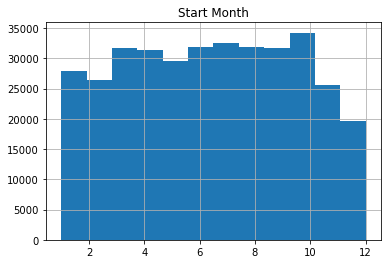

In [32]:
tripFile.hist("Start Month",bins = 12)

**Question 6 [10 Points]**. Find the most frequently used bike (Bike #)

In [23]:
most_used_Bike = tripFile["Bike #"].value_counts().idxmax()
most_used_Bike

878

**Question 7 [10 Points]** Select the trips started in 2014

In [35]:
locList = []
for i in range(tripFile.shape[0]):
    if "2014" in str(tripFile.loc[i]["Start Date"]):
        locList.append(i)

tripFile_selected = tripFile.reindex(locList)

**Question 8 [5 Points]** Find the average duration of trips

In [25]:
float("{:.2f}".format(tripFile["Duration"].sum() / tripFile.shape[0]))

1046.03

**Question 9 [5 Points]** Load the data in station.csv file (uploaded on Piazza). Set its index to "station_id". Then select only "lat" and "long". You will use this result in the following questions. So keep it in a variable. Then show the first 3 rows.

In [26]:
station = pd.read_csv("station.csv")
station = station.set_index("station_id")
new_station = station[["lat","long"]]
new_station.head(3)

,lat,long
station_id,,
2,37.329732,-121.901782
3,37.330698,-121.888979
4,37.333988,-121.894902


In [27]:
station.head(10)

,name,lat,long,dockcount,landmark,installation
station_id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013


**Question 10[20 Points]** Create a table in which the index is the ids of stations (i.e., station_id) with three columns: longitude, latitude and the number of trips started from the respective station. That is, each row represents a station. The name of the column for the number of trips should be "count". Show three rows of this table.

In [28]:
tabl2 = new_station.rename(columns = {"lat":"latitude","long":"longitude"})
trip = pd.read_csv("trip.csv")
trip["count"] = 1
trip = trip.set_index("Trip ID")
trip = trip[["count","Start Terminal"]]
trip = trip.groupby("Start Terminal").count()

tabl2 = tabl2.join(trip)

tabl2.head(3)


,latitude,longitude,count
station_id,,,
2,37.329732,-121.901782,4968
3,37.330698,-121.888979,774
4,37.333988,-121.894902,1958


**Question 11 [15 Points]** Using folium library, create blue circles on an interactive map for each station in stations.csv file where the radius is 1/1000th of the number of trips started from the respective stations. That is, if there are 2500 trips started in station X, then the radious of the circle should be 2.5 and the circle should be drawn at the geographic location of the station X on the map. 
The map should be started at (37.6, -122.4) coordinates and zoom_start parameter should be set to 10. 
A screenshot showing how your answer should look like is uploaded on uzak.etu.edu.tr

In [29]:
import folium
from folium import plugins
import os

m = folium.Map(location=[37.6,-122.4],zoom_start=10)
index_list = list(tabl2.index.values)

tabl2.apply(
                lambda x: folium.CircleMarker([ x["latitude"],x["longitude"]],
                                       popup = index_list,
                                       radius = x["count"]/1000      
                                             ).add_to(m), 
    axis = 1
)

m
